<a href="https://colab.research.google.com/github/MLEbyNoman/ArrayToolKit/blob/main/3_1_ANN_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DNN
## ANNs
### ANN for regression


In [1]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

### Importing Libraries

- **`numpy`**: Used for numerical operations, especially for creating and manipulating arrays.
- **`torch`**: The core PyTorch library used for tensor computation and deep learning.
- **`torch.nn`**: Contains neural network layers and modules for building and training models.
- **`matplotlib.pyplot`**: A popular plotting library for creating visualizations like graphs and charts.
- **`matplotlib_inline.backend_inline.set_matplotlib_formats('svg')`**: Ensures plots are rendered as high-quality **SVG** images in Jupyter notebooks.

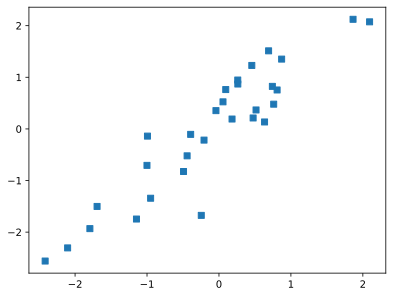

In [2]:
# create data

N = 30
x = torch.randn(N,1) #a column vector with N random numbers. Column Tensor (Pytorch), Column Vector (Linear Algebra)
y = x + torch.randn(N,1)/2

# and plot
plt.plot(x,y,'s')
plt.show()

In [3]:
# build model
ANNreg = nn.Sequential(
    nn.Linear(1,1),  # input layer
    nn.ReLU(),       # activation function
    nn.Linear(1,1)   # output layer
    )

ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

### Building the Neural Network Model

This code creates a simple **Artificial Neural Network (ANN)** for a regression task using PyTorch.

**Explanation:**

- **`nn.Sequential(...)`**  
  Stacks layers in order to form the model.

- **`nn.Linear(1,1)` (first layer)**  
  Takes **1 input feature** and produces **1 output neuron**.

- **`nn.ReLU()`**  
  Activation function that introduces **non-linearity** (outputs `max(0, x)`).

- **`nn.Linear(1,1)` (output layer)**  
  Produces the final prediction.

---

### Model Flow

Input (1) → Linear → ReLU → Linear → Output (1)

---

This is a **very small regression network** used to learn the relationship between `x` and `y`.

### Output Activations by Task:

- **Predict number** → Linear
- **Predict yes/no** → Sigmoid
- **Predict one of many classes** → Softmax

---

### Key Points:

- **Linear layers** → learn patterns
- **Activation functions** → add non-linearity
- **Both together** → powerful neural network

In [4]:
# learning rate
learningRate = .05

# loss function
lossfun = nn.MSELoss()

# optimizer (the flavor of gradient descent to implement)
optimizer = torch.optim.SGD(ANNreg.parameters(),lr=learningRate)

In [6]:
for name, param in ANNreg.named_parameters():
    print(name, param.shape)

0.weight torch.Size([1, 1])
0.bias torch.Size([1])
2.weight torch.Size([1, 1])
2.bias torch.Size([1])


In [7]:
total_params = sum(p.numel() for p in ANNreg.parameters())
print("Total parameters:", total_params)

Total parameters: 4


### Optimizer, Loss, and Learning Rate — Quick Notes

- **Uses Stochastic Gradient Descent (SGD)**  
- **Updates model weights to reduce loss**

---

### What does `ANNreg.parameters()` do?

`ANNreg.parameters()` tells the optimizer **what to update**.

It returns all **weights and biases inside the Linear layers**.

💬 Think of it as saying:  
> “Hey optimizer, update all weights and biases inside my model.”

---

### What does `lr` mean?

- **lr (learning rate)** → step size during learning  
- It controls **how big each weight update is**

---

### How SGD works

**SGD (Stochastic Gradient Descent)** is a widely used optimization algorithm.

It updates weights by:

1. Computing the gradient of the loss w.r.t. each weight  
2. Moving weights in the **opposite direction of the gradient**  
3. Repeating until loss is minimized  

---

### Key Concepts

- **Learning rate** → controls how much weights change each step  
- **Loss function** → measures how wrong predictions are (MSE for regression)  
- **Optimizer** → updates weights using gradients (here: SGD)  

Together, they enable the neural network to learn from data.

In [8]:
# train the model
numepochs = 500 #number of training rounds.
losses = torch.zeros(numepochs) #saves loss values so you can later plot learning progress.

## Train the model!
for epochi in range(numepochs):

  # forward pass
  yHat = ANNreg(x) #The model predicts output (yHat) from input (x).

  # compute loss
  loss = lossfun(yHat,y) #Compares predictions with true values using MSE loss.
  losses[epochi] = loss #Stores the loss for tracking.

  # backprop
  optimizer.zero_grad() #clears old gradients (important!)
  loss.backward() #computes gradients of loss w.r.t. weights
  optimizer.step() #updates weights using SGD to reduce loss

In [9]:
# Check the final weights and biases after training

# Access the parameters of the model (weights and biases)
for name, param in ANNreg.named_parameters():
    print(f"Parameter name: {name}")
    print(f"Parameter value: {param.detach().numpy()}")
    print('-' * 40)

Parameter name: 0.weight
Parameter value: [[0.67212784]]
----------------------------------------
Parameter name: 0.bias
Parameter value: [1.4707171]
----------------------------------------
Parameter name: 2.weight
Parameter value: [[1.6098602]]
----------------------------------------
Parameter name: 2.bias
Parameter value: [-2.2832286]
----------------------------------------


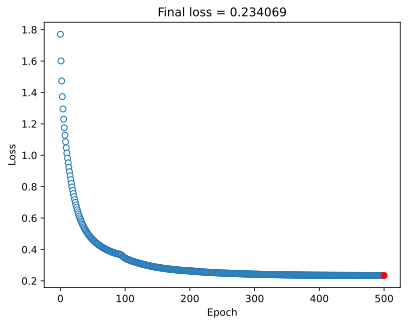

In [10]:
# show the losses

# manually compute losses
# final forward pass
predictions = ANNreg(x)

# final loss (MSE)
testloss = (predictions-y).pow(2).mean() #predictions is a tensor of size (N,1) where N is the number of samples.

plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.plot(numepochs,testloss.detach(),'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final loss = %g' %testloss.item())
plt.show()

In [11]:
testloss.item()

0.23406891524791718

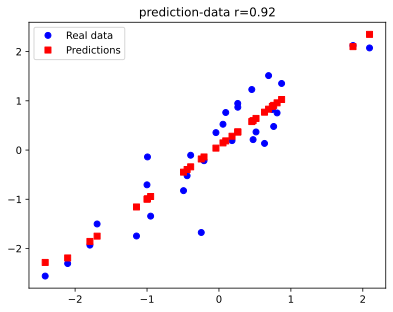

In [12]:
# plot the data
plt.plot(x,y,'bo',label='Real data')
plt.plot(x,predictions.detach(),'rs',label='Predictions')
plt.title(f'prediction-data r={np.corrcoef(y.T,predictions.detach().T)[0,1]:.2f}')
plt.legend()
plt.show()

# Additional explorations

In [ ]:
# 1) How much data is "enough"? Try different values of N and see how low the loss gets.
#    Do you still get low loss ("low" is subjective, but let's say loss<.25) with N=10? N=5?
#
# 2) Does your conclusion above depend on the amount of noise in the data? Try changing the noise level
#    by changing the division ("/2") when creating y as x+randn.
#
# 3) Notice that the model doesn't always work well. Put the original code (that is, N=30 and /2 noise)
#    into a function or a for-loop and repeat the training 100 times (each time using a fresh model instance).
#    Then count the number of times the model had a loss>.25.

### Remember
### Hidden Layers vs Output Layer in Neural Networks

In neural networks, each **hidden layer** typically uses both:

- **Linear transformation** (via weights and biases)  
- **Non-linearity** (via an activation function like ReLU, Sigmoid, etc.)

However, the **output layer** often does **not** use a generic activation function — it depends on the task.

---

## Why the Output Layer Often Doesn’t Have an Activation Function

### 1. Regression (Predicting continuous values)

In regression, the output layer is typically **linear only** (no activation).

**Why?**  
We want the model to output **any real number** (positive or negative).

If we used activations:

- ReLU → restricts output to ≥ 0, which is not acceptable  
- Sigmoid → restricts output to 0–1, which is not acceptable

But regression requires **unconstrained outputs**.

**Pattern:**

Linear → (no activation) → Output

**Examples:**

- House price prediction  
- Temperature prediction  
- Stock price forecasting  

---

### 2. Binary Classification (Predicting yes/no)

The output layer uses **Sigmoid**.

**What happens:**

- Linear computes the raw score (logit)  
- Sigmoid converts it to a probability between 0 and 1  

**Why?**  
Binary classification needs probability output.

**Pattern:**

Linear → Sigmoid → Output (0–1)

---

### 3. Multi-Class Classification (Predicting multiple classes)

The output layer uses **Softmax**.

**What happens:**

- Linear produces raw scores for each class  
- Softmax converts them into probabilities that sum to 1  

**Why?**  
We need a probability distribution across classes.

**Pattern:**

Linear → Softmax → Output (probabilities sum to 1)

---

##  Final Thoughts

- Hidden layers → Linear + Activation (e.g., ReLU) to learn complex patterns  
- Output layer (regression) → Linear only (no activation)  
- Output layer (binary classification) → Linear + Sigmoid  
- Output layer (multi-class classification) → Linear + Softmax  

So, Choose the **output activation based on the task**, not by default.